In [5]:
#Read SST files - July 2021
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import os

import yaml

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
from gsw import sigma0
import cartopy.crs as ccrs
import cartopy.feature as cfeature

os.chdir('/Users/Administrateur/Desktop/SST')
os.getcwd()

'C:\\Users\\Administrateur\\Desktop\\SST'

In [6]:
# Read configuration file

with open(r'/Users/Administrateur/Desktop/SST/configuration.yaml') as file:
    configuration = yaml.load(file, Loader=yaml.FullLoader)

    print("File version: ", configuration["version"])

File version:  0.1


In [12]:
# Clean OutPut

if len(os.listdir(configuration['SST_output_path'])) != 0:
    
     arr = os.listdir(configuration['SST_output_path'])
     for x in arr:
         os.remove((configuration['SST_output_path'] + x))
         print("delete file: ", (configuration['SST_output_path'] + x))
     
    
else:    
    print("Directory is empty")
    

delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_01.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_02.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_03.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_04.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_05.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_06.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_07.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_08.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_09.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_10.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_2019_11.nc
delete file:  /Users/Administrateur/Desktop/SST/Nordic_Sea/SST_Nordi_Sea_201

In [13]:
path = configuration['SST_DATA_path']
mlist = list(['01','02','03','04','05','06','07','08','09','10','11','12'])

mm = '12'
yy = configuration['YEARS_1']
#mm = '06'

for yy in range(configuration['YEARS_1'],configuration['YEARS_2']):
    for mm in mlist:
        ds = xr.open_mfdataset(path + str(yy) + '/' + mm + '/*.nc', combine='nested', concat_dim='time')
        ds = ds.drop(['sea_ice_fraction','mask'])
        dsub = ds.where((ds['lon']>=configuration['longitude1_oceans']) & (ds['lon']<=configuration['longitude2_oceans']) & (ds['lat']>=configuration['latitude2_oceans']) & 
              (ds['lat']<=configuration['latitude1_oceans']), drop=True)
       
        dsub.to_netcdf(configuration['SST_output_path'] + configuration['SST_prefix'] + str(yy) + '_' + mm + '.nc')
        print(yy)
        print(mm)


1993
01
1993
02
1993
03
1993
04
1993
05
1993
06
1993
07
1993
08
1993
09
1993
10
1993
11
1993
12
1994
01
1994
02
1994
03
1994
04
1994
05
1994
06
1994
07
1994
08
1994
09
1994
10
1994
11
1994
12
1995
01
1995
02
1995
03
1995
04
1995
05
1995
06
1995
07
1995
08
1995
09
1995
10
1995
11
1995
12
1996
01
1996
02
1996
03
1996
04
1996
05
1996
06
1996
07
1996
08
1996
09
1996
10
1996
11
1996
12
1997
01
1997
02
1997
03
1997
04
1997
05
1997
06
1997
07
1997
08
1997
09
1997
10
1997
11
1997
12
1998
01
1998
02
1998
03
1998
04
1998
05
1998
06
1998
07
1998
08
1998
09
1998
10
1998
11
1998
12
1999
01
1999
02
1999
03
1999
04
1999
05
1999
06
1999
07
1999
08
1999
09
1999
10
1999
11
1999
12
2000
01
2000
02
2000
03
2000
04
2000
05
2000
06
2000
07
2000
08
2000
09
2000
10
2000
11
2000
12
2001
01
2001
02
2001
03
2001
04
2001
05
2001
06
2001
07
2001
08
2001
09
2001
10
2001
11
2001
12
2002
01
2002
02
2002
03
2002
04
2002
05
2002
06
2002
07
2002
08
2002
09
2002
10
2002
11
2002
12
2003
01
2003
02
2003
03
2003
04
2003
05


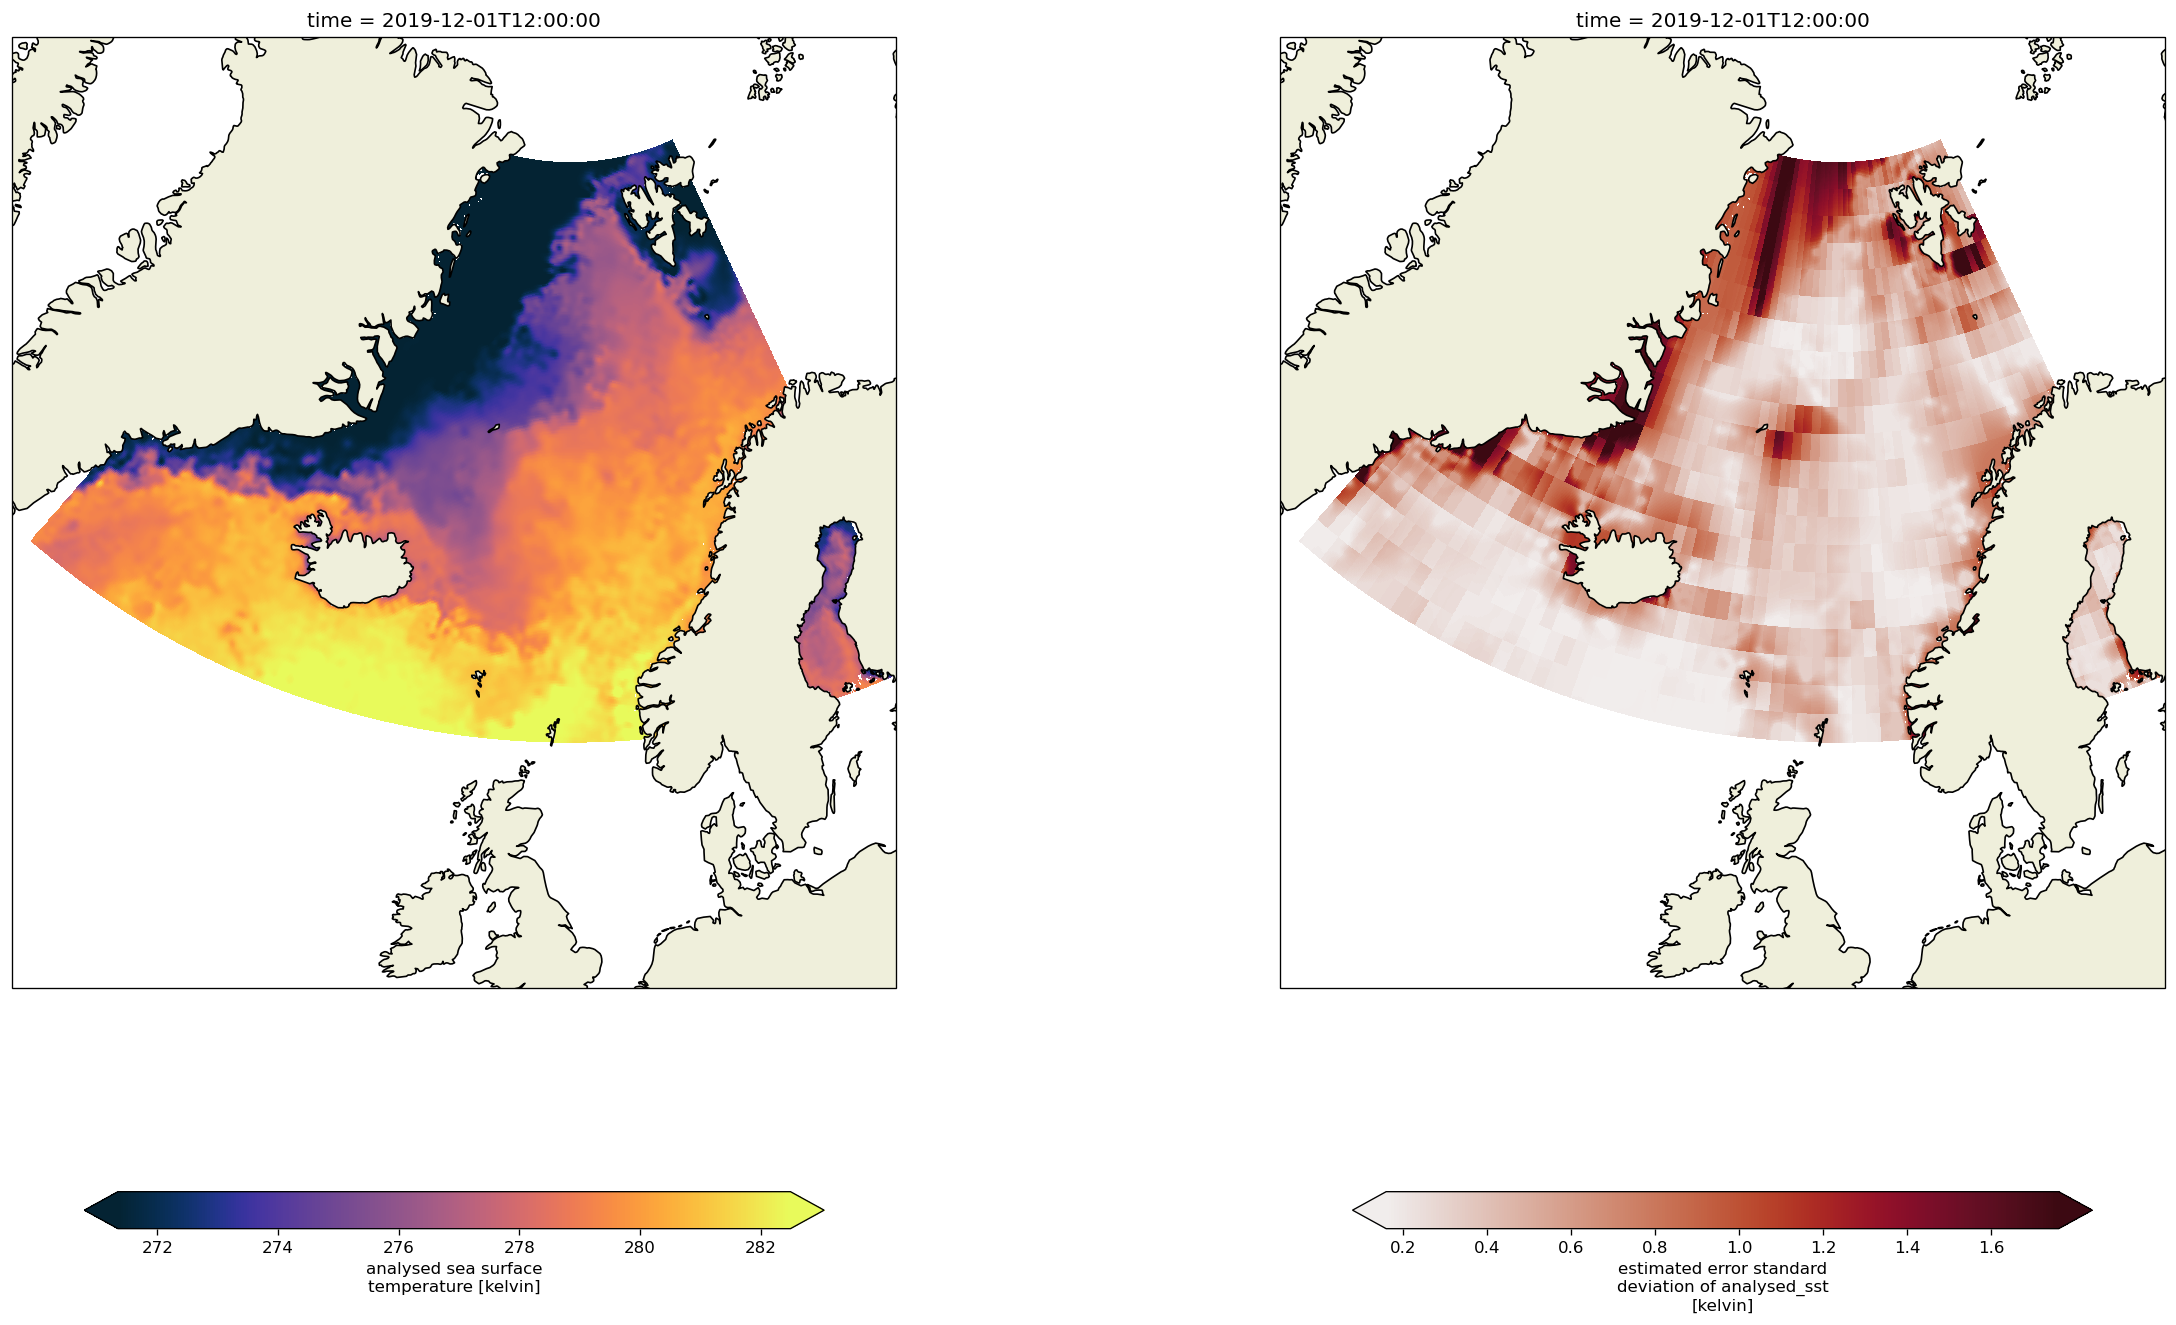

In [11]:
#PLOT
proj=ccrs.NorthPolarStereo()
land_feature = cfeature.NaturalEarthFeature(
    category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
extent = np.array([17, -30, 50, 85])
subplot_kw = {'projection': proj, 'extent': extent}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 15), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

dsub['analysed_sst'].isel(time=0).plot(ax=ax[0],
                  cmap=cmocean.cm.thermal,center=False,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                  robust=True)
ax[0].add_feature(land_feature, edgecolor='black')
ax[0].contour(dsub['lon'],dsub['lat'],dsub['analysed_sst'].isel(time=0),colors = "black",linewidths = 1)

dsub['analysis_uncertainty'].isel(time=0).plot(ax=ax[1],
                  cmap=cmocean.cm.amp,center=False,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
                  robust=True)
ax[1].add_feature(land_feature, edgecolor='black')